### Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

### Sourcing and Loading

#### Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [65]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

#### Exploring the data

In [67]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [68]:
properties.shape

(331, 49)

#### Cleaning the data

In [69]:
#transpose the data
properties = properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,321,322,323,324,325,326,327,328,329,330
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,954883.5623,793389.303,799674.7093,809376.0744,796047.1779,856301.3695,820301.6021,860938.146,802499.9324,830376.165
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,315039.4514,326713.3328,328530.925,330850.6123,337556.8251,341428.3513,342723.2034,339305.0077,337715.1923,342083.4519
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,554751.7729,568918.4141,572810.1795,574877.2915,581452.9611,578243.1188,582655.2462,594130.6286,600963.0729,599286.6158
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,371845.6682,374878.1357,377659.1213,378364.5877,380927.4203,384241.381,389416.9541,391216.7404,393388.7677,395012.0758


In [70]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [71]:
properties = properties.reset_index()

In [72]:
properties.index

RangeIndex(start=0, stop=49, step=1)

In [73]:
properties.head()

,index,0,1,2,3,4,5,6,7,8,...,321,322,323,324,325,326,327,328,329,330
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,954883.5623,793389.303,799674.7093,809376.0744,796047.1779,856301.3695,820301.6021,860938.146,802499.9324,830376.165
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,315039.4514,326713.3328,328530.925,330850.6123,337556.8251,341428.3513,342723.2034,339305.0077,337715.1923,342083.4519
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,554751.7729,568918.4141,572810.1795,574877.2915,581452.9611,578243.1188,582655.2462,594130.6286,600963.0729,599286.6158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,371845.6682,374878.1357,377659.1213,378364.5877,380927.4203,384241.381,389416.9541,391216.7404,393388.7677,395012.0758


In [74]:
properties.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           321,     322,     323,     324,     325,     326,     327,     328,
           329,     330],
      dtype='object', length=332)

In [75]:
properties.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,321,322,323,324,325,326,327,328,329,330
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00


In [76]:
properties.columns = properties.iloc[0]

In [13]:
properties.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,954883.5623,793389.303,799674.7093,809376.0744,796047.1779,856301.3695,820301.6021,860938.146,802499.9324,830376.165
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,315039.4514,326713.3328,328530.925,330850.6123,337556.8251,341428.3513,342723.2034,339305.0077,337715.1923,342083.4519
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,554751.7729,568918.4141,572810.1795,574877.2915,581452.9611,578243.1188,582655.2462,594130.6286,600963.0729,599286.6158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,371845.6682,374878.1357,377659.1213,378364.5877,380927.4203,384241.381,389416.9541,391216.7404,393388.7677,395012.0758


In [77]:
#Drop the row at index 0
properties = properties.drop(0) 

In [78]:
#Drop the row at index 0
properties.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,954883.5623,793389.303,799674.7093,809376.0744,796047.1779,856301.3695,820301.6021,860938.146,802499.9324,830376.165
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,315039.4514,326713.3328,328530.925,330850.6123,337556.8251,341428.3513,342723.2034,339305.0077,337715.1923,342083.4519
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,554751.7729,568918.4141,572810.1795,574877.2915,581452.9611,578243.1188,582655.2462,594130.6286,600963.0729,599286.6158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,371845.6682,374878.1357,377659.1213,378364.5877,380927.4203,384241.381,389416.9541,391216.7404,393388.7677,395012.0758
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,517734.2015,512019.2975,519123.411,522416.266,519263.5237,524082.1442,526105.1622,534127.0746,533332.6033,528087.4204


In [79]:
#### Rename the columns of Unnamed and NaT
properties = properties.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [80]:
properties.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,954883.5623,793389.303,799674.7093,809376.0744,796047.1779,856301.3695,820301.6021,860938.146,802499.9324,830376.165
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,315039.4514,326713.3328,328530.925,330850.6123,337556.8251,341428.3513,342723.2034,339305.0077,337715.1923,342083.4519
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,554751.7729,568918.4141,572810.1795,574877.2915,581452.9611,578243.1188,582655.2462,594130.6286,600963.0729,599286.6158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,371845.6682,374878.1357,377659.1213,378364.5877,380927.4203,384241.381,389416.9541,391216.7404,393388.7677,395012.0758
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,517734.2015,512019.2975,519123.411,522416.266,519263.5237,524082.1442,526105.1622,534127.0746,533332.6033,528087.4204


In [81]:
#to find out how many columns are there
properties.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2021-09-01 00:00:00, 2021-10-01 00:00:00, 2021-11-01 00:00:00,
       2021-12-01 00:00:00, 2022-01-01 00:00:00, 2022-02-01 00:00:00,
       2022-03-01 00:00:00, 2022-04-01 00:00:00, 2022-05-01 00:00:00,
       2022-06-01 00:00:00],
      dtype='object', name=0, length=332)

#### Transforming the data


In [82]:
#data has too many columns. using .melt function to reshape the data and tranform from wide to tall. 
clean_properties = pd.melt(properties, id_vars= ['London_Borough', 'ID'])

In [83]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [84]:
# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [85]:
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [86]:
clean_properties.dtypes 

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [87]:
#changing the data type for average_price
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [25]:
clean_properties.dtypes 

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [88]:
# To see if there are any missing values, we should call the count() method on our DataFrame:
clean_properties.count()

London_Borough    15840
ID                14850
Month             15840
Average_price     14850
dtype: int64

In [89]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [90]:
# Subset clean_properties on the condition: df['London_Borough'] == 'Unnamed: 34' to see what information these rows contain. 
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [91]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [92]:
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
15780,Unnamed: 37,NaN,2022-05-01,NaN
15790,Unnamed: 47,NaN,2022-05-01,NaN
15825,Unnamed: 34,NaN,2022-06-01,NaN
15828,Unnamed: 37,NaN,2022-06-01,NaN


In [93]:
clean_properties['ID'].isna().sum()

990

In [94]:
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(50)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [95]:
NaNFreeDF1.count()

London_Borough    14850
ID                14850
Month             14850
Average_price     14850
dtype: int64

In [96]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(50)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [97]:
NaNFreeDF2.count()

London_Borough    14850
ID                14850
Month             14850
Average_price     14850
dtype: int64

In [98]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [99]:
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(15840, 4)
(14850, 4)
(14850, 4)


In [100]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [101]:
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
15834,EAST OF ENGLAND,E12000006,2022-06-01,354481.21620
15835,LONDON,E12000007,2022-06-01,537919.90960
15836,SOUTH EAST,E12000008,2022-06-01,390513.20820
15837,SOUTH WEST,E12000009,2022-06-01,322328.84820


In [102]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15820,Sutton,E09000029,2022-06-01,437192.36810
15821,Tower Hamlets,E09000030,2022-06-01,484026.09040
15822,Waltham Forest,E09000031,2022-06-01,501172.30330
15823,Wandsworth,E09000032,2022-06-01,638840.62270


In [103]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [104]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [105]:
#final cleaned dataframe
df=NaNFreeDF2

In [106]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [107]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

#### Visualizing the data

Text(0, 0.5, 'Price')

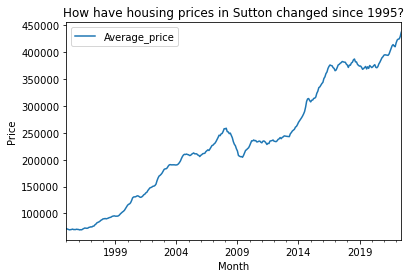

In [108]:
sutton_prices = df[df['London_Borough'] == 'Sutton']
ax = sutton_prices.plot(kind='line',x = 'Month', y='Average_price',title='How have housing prices in Sutton changed since 1995?')
ax.set_ylabel('Price')

In [109]:
df['Year'] = df['Month'].apply(lambda t: t.year)
df.tail()

,London_Borough,ID,Month,Average_price,Year
15820,Sutton,E09000029,2022-06-01,437192.3681,2022
15821,Tower Hamlets,E09000030,2022-06-01,484026.0904,2022
15822,Waltham Forest,E09000031,2022-06-01,501172.3033,2022
15823,Wandsworth,E09000032,2022-06-01,638840.6227,2022
15824,Westminster,E09000033,2022-06-01,944440.7465,2022


In [110]:
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average_price
London_Borough,Year,
Hackney,2017,549005.563992
Wandsworth,2015,572691.164608
Harrow,2000,152494.290858
Hillingdon,2010,247991.526308
Wandsworth,1996,92270.037989
Lewisham,2001,121333.172717
Hillingdon,2007,253838.660325
Bexley,2011,200672.256583
Wandsworth,1995,88829.083075


In [111]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


#### Modeling

In [112]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

In [113]:
create_price_ratio(dfg[dfg['London_Borough']=='Camden'])

[0.20261973503252542]

In [114]:
final = {}

In [115]:
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)

print(final)

{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.229452741207858], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837315], 'Camden': [0.20261973503252542], 'City of London': [0.18862157770244364], 'Croydon': [0.23803288028014052], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011858], 'Greenwich': [0.20995010893854213], 'Hackney': [0.16133493530705728], 'Hammersmith & Fulham': [0.24167443054605847], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.2312015578701476], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300288], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.2341619023428255], 'Lambeth': [0.20170435486140825], 'Lewisham': [0.18351246764721704], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark': [

In [116]:
df_ratios= pd.DataFrame(final)

In [117]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,0.234551,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [118]:
df_ratios = df_ratios.transpose()
df_ratios = df_ratios.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [119]:
df_ratios.rename(columns={'index':'London_Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,London_Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [58]:
top30 = df_ratios.sort_values(by='2018',ascending=False).head(30)
print(top30)

          London_Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655
29         Tower Hamlets  0.216137
23                Merton  0.210914
31            Wandsworth  0.210185
10             Greenwich  0.209950
18             Islington  0.206439
3                  Brent  0.204309
0     Barking & Dagenham  0.204223
5                 Camden  0.202620
21               Lambeth  0.201704
19  Kensington & Chelsea  0.196755
13              Haringey  0.194756
6         City of London  0.188622
24                Ne

[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge'),
 Text(15, 0, 'Tower Hamlets'),
 Text(16, 0, 'Merton'),
 Text(17, 0, 'Wandsworth'),
 Text(18, 0, 'Greenwich'),
 Text(19, 0, 'Islington'),
 Text(20, 0, 'Brent'),
 Text(21, 0, 'Barking & Dagenham'),
 Text(22, 0, 'Camden'),
 Text(23, 0, 'Lambeth'),
 Text(24, 0, 'Kensington & Chelsea'),
 Text(25, 0, 'Haringey'),
 Text(26, 0, 'City of London'),
 Text(27, 0, 'Newham'),
 Text(28, 0, 'Westminster'),
 Text(29, 0, 'Lewisham')]

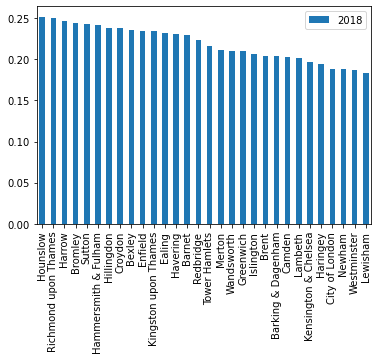

In [59]:
ax = top30[['London_Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top30.London_Borough)

### which boroughs of London have seen the greatest house price increase, on average, over the past two decades?


In [120]:
#To answer the above question, I think the smaller the ratio value the higher the house price.

df_ratios.sort_values(by='2018')

,London_Borough,2018
11,Hackney,0.161335
30,Waltham Forest,0.171387
27,Southwark,0.181275
22,Lewisham,0.183512
32,Westminster,0.186791
24,Newham,0.188488
6,City of London,0.188622
13,Haringey,0.194756
19,Kensington & Chelsea,0.196755
21,Lambeth,0.201704


[Text(0, 0, 'Barking & Dagenham'),
 Text(1, 0, 'Barnet'),
 Text(2, 0, 'Bexley'),
 Text(3, 0, 'Brent'),
 Text(4, 0, 'Bromley'),
 Text(5, 0, 'Camden'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Ealing'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Greenwich'),
 Text(11, 0, 'Hackney'),
 Text(12, 0, 'Hammersmith & Fulham'),
 Text(13, 0, 'Haringey'),
 Text(14, 0, 'Harrow'),
 Text(15, 0, 'Havering'),
 Text(16, 0, 'Hillingdon'),
 Text(17, 0, 'Hounslow'),
 Text(18, 0, 'Islington'),
 Text(19, 0, 'Kensington & Chelsea'),
 Text(20, 0, 'Kingston upon Thames'),
 Text(21, 0, 'Lambeth'),
 Text(22, 0, 'Lewisham'),
 Text(23, 0, 'Merton'),
 Text(24, 0, 'Newham'),
 Text(25, 0, 'Redbridge'),
 Text(26, 0, 'Richmond upon Thames'),
 Text(27, 0, 'Southwark'),
 Text(28, 0, 'Sutton'),
 Text(29, 0, 'Tower Hamlets'),
 Text(30, 0, 'Waltham Forest'),
 Text(31, 0, 'Wandsworth'),
 Text(32, 0, 'Westminster')]

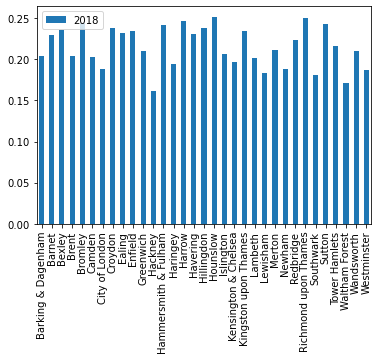

In [121]:
ax = df_ratios[['London_Borough','2018']].plot(kind='bar')

ax.set_xticklabels(df_ratios.London_Borough)

### TOP 15 London boroughs whose average price have seen the greatest increase from 1998 to 2018

In [62]:
top15 = df_ratios.sort_values(by='2018').head(15)
print(top15)

          London_Borough      2018
11               Hackney  0.161335
30        Waltham Forest  0.171387
27             Southwark  0.181275
22              Lewisham  0.183512
32           Westminster  0.186791
24                Newham  0.188488
6         City of London  0.188622
13              Haringey  0.194756
19  Kensington & Chelsea  0.196755
21               Lambeth  0.201704
5                 Camden  0.202620
0     Barking & Dagenham  0.204223
3                  Brent  0.204309
18             Islington  0.206439
10             Greenwich  0.209950


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

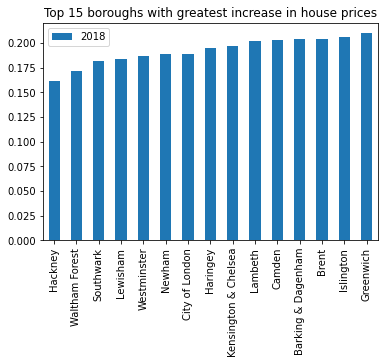

In [123]:
ax = top15[['London_Borough','2018']].plot(kind='bar', title='Top 15 boroughs with greatest increase in house prices')

ax.set_xticklabels(top15.London_Borough)

### 'Hackney', 'Waltham Forest', 'Southwark','Lewisham','Westminster', 'Newham', 'City of London', 'Haringey', 'Kensington & Chelsea', 'Lambeth', 'Camden', 'Barking & Dagenham', 'Brent', 'Islington', 'Greenwich' are the  Top 15 boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades,  